In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy

Part C


In [2]:
def rmatrix(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        helper = np.random.rand()
        if helper>=prob:
            random_weight = 1
        else:
            random_weight = 0
        gr1.edges[u,v]['weight'] = random_weight
    old_adj = nx.adjacency_matrix(gr1)
    adj = nx.adjacency_matrix(gr1)
    return adj.todense()

In [3]:
adj1 = rmatrix(0.3,10)

In [4]:
def katz_centrality_(adj_matrix, alpha = 0.45):
    size = adj_matrix.shape[0]
    I = np.identity(size)
    inside = np.linalg.inv(I- alpha*np.transpose(adj_matrix))
    centralities1 = list(np.asarray(np.dot((inside-I),np.ones(size)))[0])
    centralities_dict = {i:centralities1[i] for i in range(len(centralities1))}
    #return centralities_dict
    return centralities1

def eq_profits(adj_matrix, thetadiff, katz_alpha):
    centralities1 = katz_centrality_(adj_matrix, katz_alpha)
    total = np.sum(centralities1)
    profits = [((thetadiff*i)/(1+total))**2 for i in centralities1]
    return profits # [ i/np.sum(profits) for i in profits]

In [5]:
list_ = []
for i in range(50):
    alpha = i/50
    pr = eq_profits(adj1, 15, alpha)
    pr.append(alpha)
    list_.append(pr)
    
    bankslist = ['bank'+str(i+1) for i in range(10)]
    bankslist.append('alpha')
df_alpha = pd.DataFrame(list_,columns= bankslist)

Here, I present RELATIVE profits, i.e. market shares of every bank. This is because absolute porfits rose with a change in aplha even though the relative didn't, something that makes the interpretation less clear. We see that modifying the attenuation factor gives more/less market share to different banks. Greater alpha gives more profits to banks connected by many step paths to competitors and vice versa:

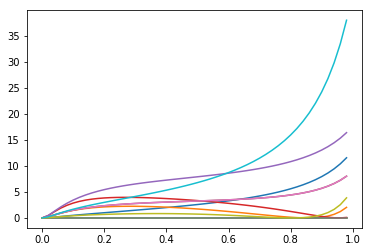

In [6]:
plt.plot(df_alpha.alpha, df_alpha.bank1)
plt.plot(df_alpha.alpha, df_alpha.bank2)
plt.plot(df_alpha.alpha, df_alpha.bank3)
plt.plot(df_alpha.alpha, df_alpha.bank4)
plt.plot(df_alpha.alpha, df_alpha.bank5)
plt.plot(df_alpha.alpha, df_alpha.bank6)
plt.plot(df_alpha.alpha, df_alpha.bank7)
plt.plot(df_alpha.alpha, df_alpha.bank8)
plt.plot(df_alpha.alpha, df_alpha.bank9)
plt.plot(df_alpha.alpha, df_alpha.bank10)
plt.show()

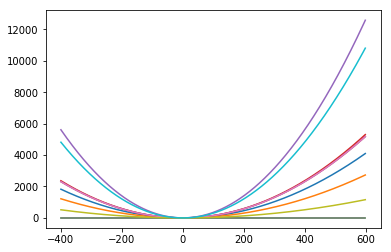

In [7]:
list__ = []
for i in range(1000):
    thetadiff= i-400
    pr = eq_profits(adj1, thetadiff, 0.5)
    pr.append(thetadiff)
    list__.append(pr)
    
    bankslist = ['bank'+str(i+1) for i in range(10)]
    bankslist.append('thetadiff')
df_thetadiff = pd.DataFrame(list__,columns= bankslist)

plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank1)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank2)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank3)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank4)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank5)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank6)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank7)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank8)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank9)
plt.plot(df_thetadiff.thetadiff, df_thetadiff.bank10)
plt.show()

We see here that market shares are unaltered if we change the thetadiff parameter. This is also the main reasons for introducing market shares, as the below (absolute profit) once again clouds the image (increase in thetadiff (it's absolute value) increases ABSOLUTE profits)

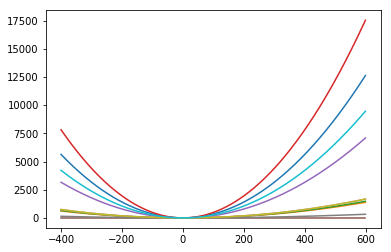

In [8]:
from IPython.display import Image
Image(filename=r'C:\Users\Jakub\Desktop\computational methods/without_shares.png')

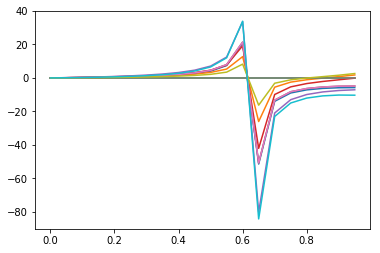

In [9]:
list___ = []
for i in range(20):
    alpha= i/20
    pr = katz_centrality_(adj1, alpha)
    pr.append(alpha)
    list___.append(pr)
    
    bankslist = ['bank'+str(i+1) for i in range(10)]
    bankslist.append('alpha')
df_alpha_katz = pd.DataFrame(list___,columns= bankslist)

plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank1)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank2)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank3)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank4)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank5)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank6)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank7)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank8)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank9)
plt.plot(df_alpha_katz.alpha, df_alpha_katz.bank10)
plt.show()

In [13]:
def katz_centrality(adj_matrix, alpha = 0.45):
    size = adj_matrix.shape[0]
    I = np.identity(size)
    inside = np.linalg.inv(I- alpha*np.transpose(adj_matrix))
    centralities = np.dot((inside-I),np.ones(size))
    centralities_ = list(np.asarray(centralities)[0])
    centralities_dict = {i:centralities_[i] for i in range(len(centralities_))}
    return centralities_dict



def which_node(some_dict):
    the_key = 0
    for key, value in some_dict.items():
        if value == min(some_dict.values()):
            the_key = key
    return the_key
def max_node(some_dict):
    the_key = 0
    for key, value in some_dict.items():
        if value == max(some_dict.values()):
            the_key = key
    return the_key
    
def rewire(matrix, prob_alpha):
    mat = copy.copy(matrix)
    centralities_ = katz_centrality(mat)
    lowest_katz = which_node(centralities_)
    l = lowest_katz
    banks_not_connected = []
    rows = mat.shape[0]
    cols = mat.shape[1]
    for x in range(0, rows):
        if mat[l,x] == 0 and mat[x,l] == 0:
                banks_not_connected.append(x)
    banks_connected = [i for i in range(10) if i not in banks_not_connected]
    # option a
    eligible_1 = {k: v for k, v in centralities_.items() if k in banks_not_connected}
    connecting_node_1 = max_node(eligible_1)
    # option b
    eligible_2 = {k: v for k, v in centralities_.items() if k not in banks_not_connected}
    connecting_node_2 = which_node(eligible_2)
    
    helper = np.random.rand()
    dir_helper = np.random.rand()
    if helper<= prob_alpha:
        # print('option a')
        # do a
        if dir_helper<0.5:
            mat[l, connecting_node_1] = 1
        else:
            mat[connecting_node_1, l] = 1
    else:
        # print('option b')
        # do b
        if dir_helper<0.5:
            mat[l, connecting_node_2] = 0
        else:
            mat[connecting_node_2, l] = 0
    return mat
recorder = []
def iterator(mat, times):
    ct = 1
    init = mat
    while ct<= times:
        now = rewire(init, 0.4)
        recorder.append(init)
        init = now
        ct+=1
iterator(adj1,50)

In [14]:
list_1= []
for i in range(len(recorder)):
    pr = eq_profits(recorder[i], 15, 0.5)
    list_1.append(pr)
    bankslist = ['bank'+str(i+1) for i in range(10)]
df_evolved_profits = pd.DataFrame(list_1,columns= bankslist)

 Part B - b)
The most profitable bank's profits decrease over time (blue), as this rewiring process redistributes links that are important for lowering marginal costs of banks. In economics terms, this means that the competition increased through more similar marginal cost and market shares seem to converge. So the position of the most powerful bank weakens and we can expect close to leveled playing field as we iterate further.

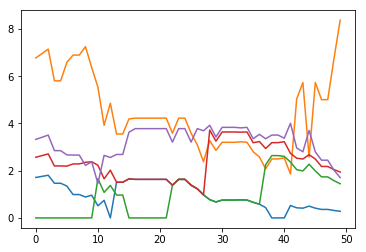

In [15]:
sns.lineplot(data = df_evolved_profits.bank2)
sns.lineplot(data = df_evolved_profits.bank10)
sns.lineplot(data = df_evolved_profits.bank3)
sns.lineplot(data = df_evolved_profits.bank1)
sns.lineplot(data = df_evolved_profits.bank4)

Part B - a)
This follows directly from the redistribution decribed above. The way this rewiring process affects the banks can be broken down in two channels:
    1. Lowering marginal cost through more connectivity
    2. Diminishing the competetive advantage of the initially well-off banks. As described in Part A, profit of a bank decreases with an increase of katz centrality of other banks.
  
I plot rolling average (at t = T, it's the average of T profits) of profits following this rewiring process below (this is the most profitable bank(blue) and the least initially profitable bank(orange)):

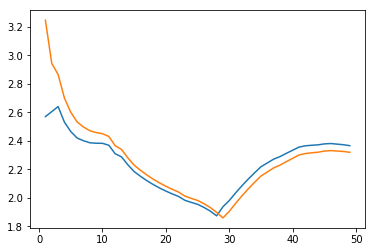

In [16]:
bank1_roll = [np.mean(df_evolved_profits.bank1[:i]) for i in range(len(df_evolved_profits.bank1))]
bank7_roll = [np.mean(df_evolved_profits.bank7[:i]) for i in range(len(df_evolved_profits.bank7))]

sns.lineplot(data = np.asarray(bank1_roll))
sns.lineplot(data = np.asarray(bank7_roll))

The above demonstrates that the rewiring (as expected) hurt the profits of the best-earning bank significantly, with profits of the two initially vastly different banks converging after 5000 iterations. This is also why the lowest Katz Centrality bank may be unable to do this - the initially well of banks, knowing the consequences of engaging in this process will refuse to participate, unless they are somehow (a regulatory procedure) forced into it.

Part B - c)
We can envision the directions of links in the interbank lending market corresponding to which bank borrows money and which loans it.

As Katz centrality only concerns outgoing links, which represent access to credit and lower marginal cost, links in the other direction (unfortunately these are incoming, which makes the argument less intuitive) can be considered loans made by the bank. These are risky and I decided to include a risk measure in the model.

This would be a modified version of the Katz centrality that concerns incoming rather than outgoing links. EXPLAIN HOW EXACTLY HERE. The modification I make is that, during the rewiring proceess, our bank would look at riskiness of it's partners and, with probability (1-alpha)/2 cancel the loan access to the riskiest partner.


We see this (after a large number of iterations) seems to counteract the convergence observed earlier:

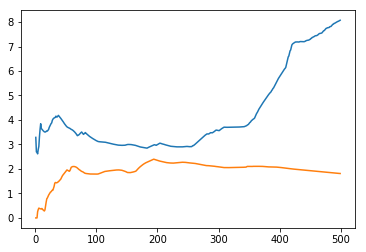

In [17]:
Image(filename=r'C:\Users\Jakub\Desktop\computational methods/risky_loans.png')

Further, there seems to be a very stable positive relationship between risk and reward:

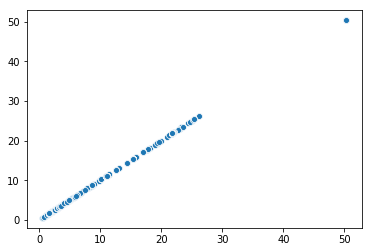

In [18]:
Image(filename=r'C:\Users\Jakub\Desktop\computational methods/risk_scatter.png')

Which was virtually nonpresent before: